In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
df1 = pd.read_csv("airline_passengers.csv", index_col = "Month", parse_dates=True)
df1.index.freq="MS"

In [3]:
df2 = pd.read_csv("DailyTotalFemaleBirths.csv", index_col = "Date", parse_dates=True)
df2.index.freq="D" #daily

In [4]:
from pandas.plotting import lag_plot


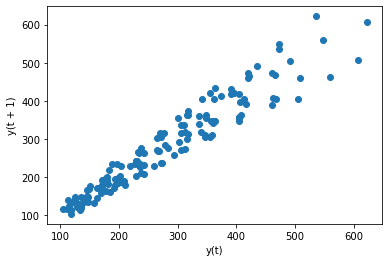

In [5]:
lag_plot(df1['Thousands of Passengers'])

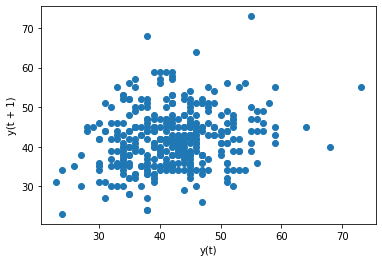

In [6]:
lag_plot(df2['Births'])

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
from statsmodels.tsa.stattools import acf, pacf

In [9]:
acf(df1['Thousands of Passengers'])

e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

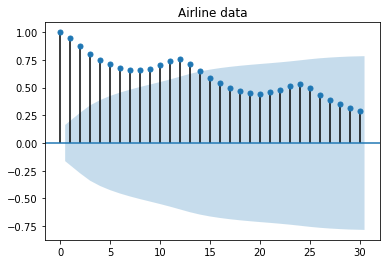

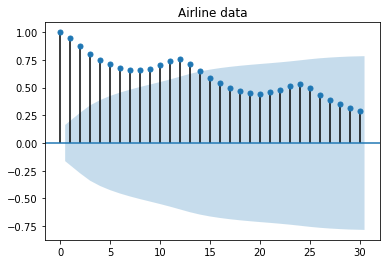

In [10]:
plot_acf(df1, title="Airline data", lags=30);

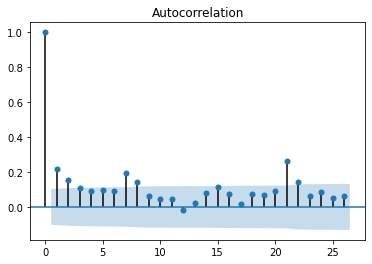

In [11]:
plot_acf(df2['Births']);

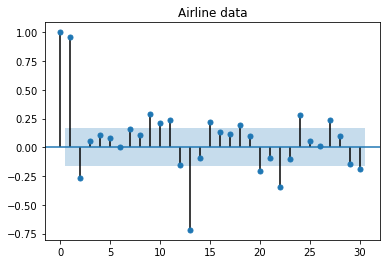

In [12]:
plot_pacf(df1, title="Airline data", lags=30);

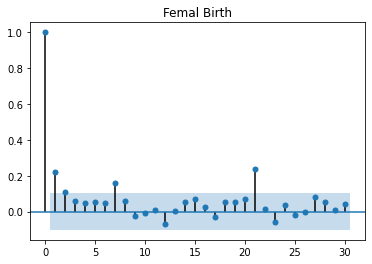

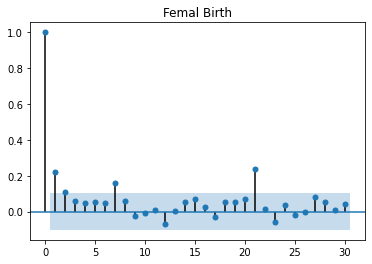

In [13]:
plot_pacf(df2, title="Femal Birth", lags = 30);

In [14]:
from statsmodels.tsa.statespace.tools import diff

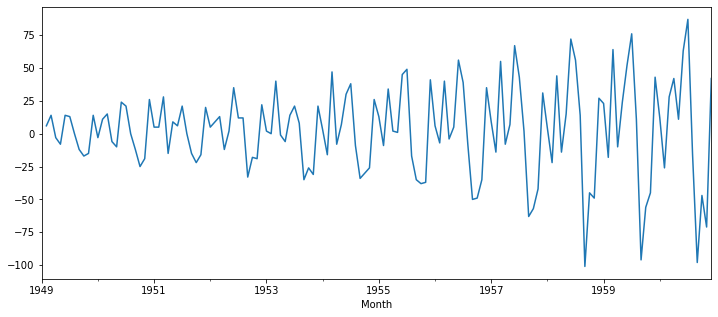

In [15]:
df1['d1']=diff(df1['Thousands of Passengers'], k_diff=1)
df1['d1'].plot(figsize=(12,5))

e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


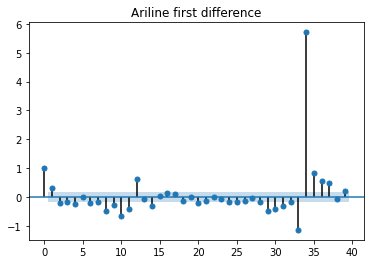

In [17]:
plot_pacf(df1['d1'].dropna(), title="Ariline first difference", lags=np.arange(40));

The above is wrong but i dont know why?? 42:00


AR

y(n) = a + b y(n-1) + noise(n)


AR2

y(n) = a + b1 y(n-1) + b2 y(n-2) + noise(n)

In [70]:
from statsmodels.tsa.ar_model import AR, ARResults

In [71]:
df = pd.read_csv("uspopulation.csv", index_col="DATE", parse_dates=True)
df.index.freqs="MS"

In [72]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [73]:
df.tail()

,PopEst
DATE,
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077
2018-11-01,328241
2018-12-01,328393


In [74]:
len(df)

96

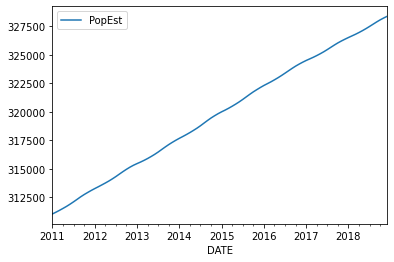

In [75]:
df.plot()

[Text(0, 0.5, 'Population'), Text(0.5, 0, '')]

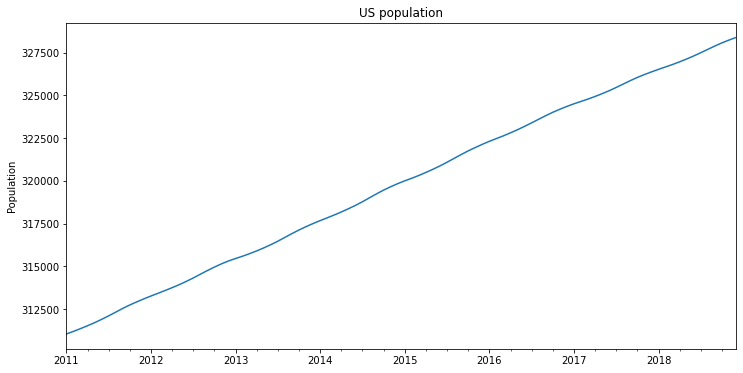

In [76]:
titile = "US population"
ylabel = "Population"
xlabel=''
ax = df['PopEst'].plot(figsize=(12,6), title=titile);
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [77]:
train=df.iloc[:84]
test=df.iloc[84:]
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1, method='mle')
print(f"Lag: {AR1fit.k_ar}")
print(f"coeffs: \n{AR1fit.params}")

Lag: 1
coeffs: 
const        147.296808
L1.PopEst      0.999537
dtype: float64


e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Fut

In [78]:
start=len(train)
end=len(train) + len(test) - 1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [79]:
predictions1

2018-01-01    326374.208364
2018-02-01    326370.418482
2018-03-01    326366.630356
2018-04-01    326362.843982
2018-05-01    326359.059362
2018-06-01    326355.276494
2018-07-01    326351.495376
2018-08-01    326347.716010
2018-09-01    326343.938392
2018-10-01    326340.162524
2018-11-01    326336.388403
2018-12-01    326332.616030
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [80]:
for i in range(len(predictions1)):
    print(f"predicted: {predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted: 326374.2084, expected=326527
predicted: 326370.4185, expected=326669
predicted: 326366.6304, expected=326812
predicted: 326362.844 , expected=326968
predicted: 326359.0594, expected=327134
predicted: 326355.2765, expected=327312
predicted: 326351.4954, expected=327502
predicted: 326347.716 , expected=327698
predicted: 326343.9384, expected=327893
predicted: 326340.1625, expected=328077
predicted: 326336.3884, expected=328241
predicted: 326332.616 , expected=328393


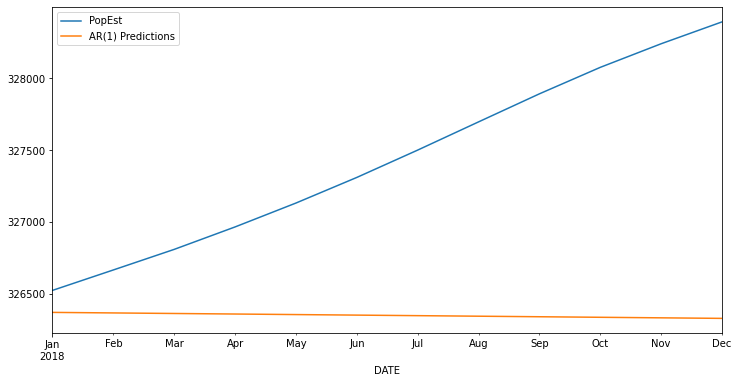

In [81]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True, figsize=(12,6))

In [83]:
model = AR(train['PopEst'])
AR2fit = model.fit(maxlag=2, method='mle')
print(f"Lag: {AR2fit.k_ar}")
print(f"coeffs: \n{AR2fit.params}")

Lag: 2
coeffs: 
const        137.361529
L1.PopEst      1.996476
L2.PopEst     -0.996907
dtype: float64


e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Fut

In [84]:
start=len(train)
end=len(train) + len(test) - 1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

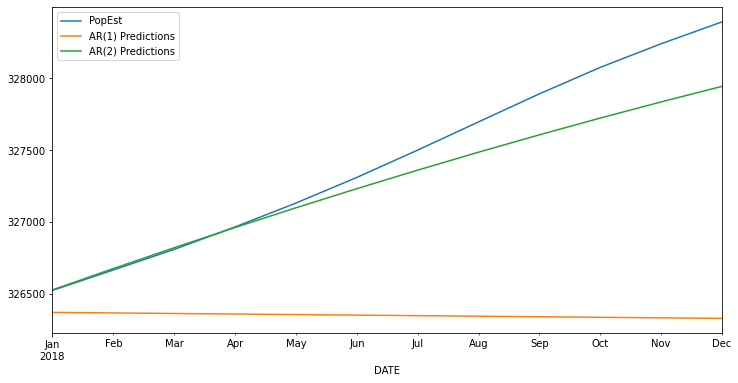

In [85]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True, figsize=(12,6))


In [89]:
model = AR(train['PopEst'])
AR11fit = model.fit(method='mle')
print(f"Lag: {AR11fit.k_ar}")
print(f"coeffs: \n{AR11fit.params}")

e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Lag: 11
coeffs: 
const         96.178185
L1.PopEst      2.310060
L2.PopEst     -2.087646
L3.PopEst      1.401213
L4.PopEst     -1.066483
L5.PopEst      0.743772
L6.PopEst     -0.795203
L7.PopEst      0.703824
L8.PopEst     -0.172876
L9.PopEst      0.187809
L10.PopEst    -0.218017
L11.PopEst    -0.006756
dtype: float64


e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [90]:
start=len(train)
end=len(train) + len(test) - 1
predictions11 = AR11fit.predict(start=start, end=end, dynamic=False).rename('AR(11) Predictions')

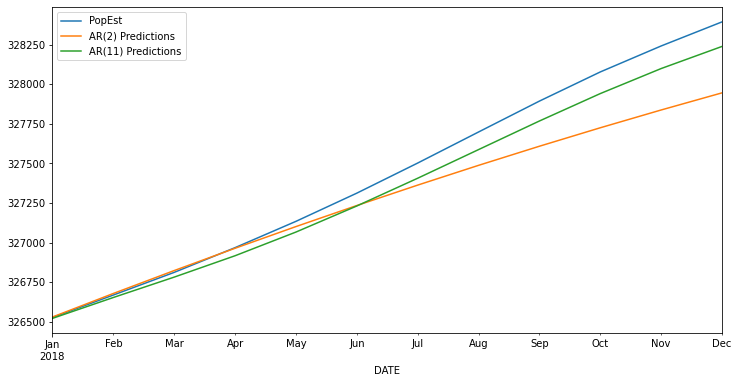

In [92]:
test['PopEst'].plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True, figsize=(12,6))


In [95]:
from sklearn.metrics import mean_squared_error
labels = ["AR(1)", "AR(2)", "AR(11)"]
preds = [predictions1, predictions2, predictions11]
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f"Error: {labels[i]} - {error}")

Error: AR(1) - 1552397.37138291
Error: AR(2) - 53365.21485481968
Error: AR(11) - 9597.423658235233


In [101]:
model = AR(df['PopEst'])
ARfit = model.fit(maxlags=11, method="mle")
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename("Forecast")

e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


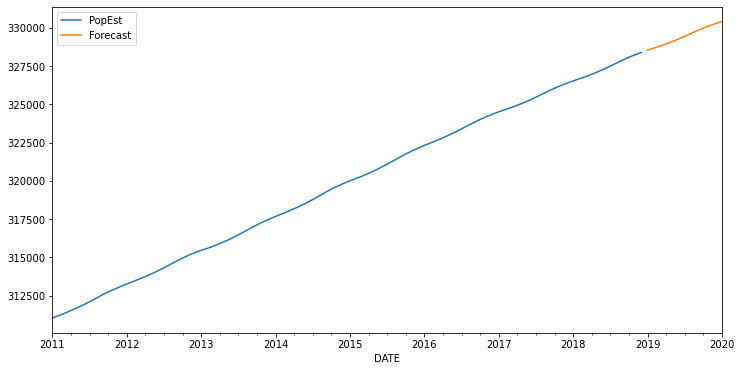

In [102]:
df['PopEst'].plot(legend=True)
fcast.plot(legend=True, figsize=(12,6))

(array([51., 42., 36., 40., 56., 51., 65., 50., 39., 50., 45., 49., 47.,
        60., 46., 49., 50., 61., 60., 53.]),
 array([6.91766782e-04, 5.05550323e-02, 1.00418298e-01, 1.50281563e-01,
        2.00144829e-01, 2.50008094e-01, 2.99871360e-01, 3.49734625e-01,
        3.99597891e-01, 4.49461156e-01, 4.99324422e-01, 5.49187688e-01,
        5.99050953e-01, 6.48914219e-01, 6.98777484e-01, 7.48640750e-01,
        7.98504015e-01, 8.48367281e-01, 8.98230546e-01, 9.48093812e-01,
        9.97957077e-01]),
 <a list of 20 Patch objects>)

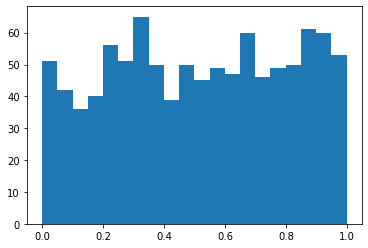

In [105]:
num_samples = 1000
num_bin=20
white_noise = np.random.random(size=num_samples)
import matplotlib.pyplot as plt
plt.hist(white_noise, num_bin)

In [106]:
pd.Series(white_noise).describe()

count    1000.000000
mean        0.517375
std         0.287921
min         0.000692
25%         0.276671
50%         0.524371
75%         0.774230
max         0.997957
dtype: float64

Quiz: write python functino which would generate auto regressive model of order n and calculate partial autocorelation functonf for few orders partial?? or no partial??

Apply this AR model from stats model to find out if we're getting the parameters correct.

1) Generate AR(n) models for n=1 to 5 with arbitrary parameters

2) Calculate partial autocereletion function for each n

3) use AR model on the generated data.